# How does bootstrapping work?

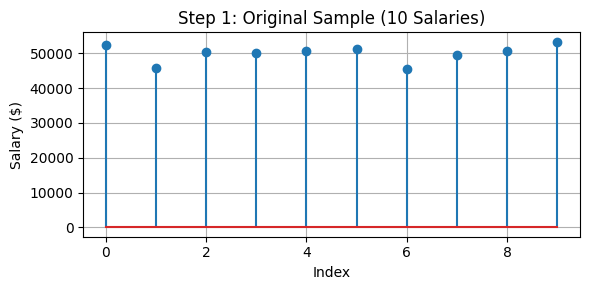

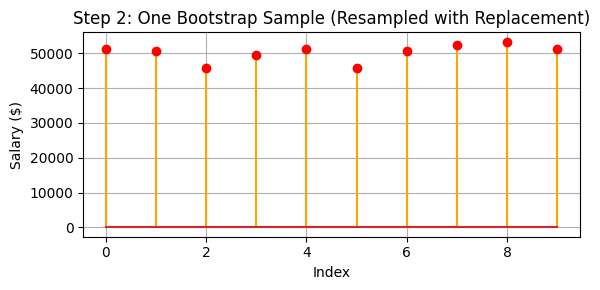

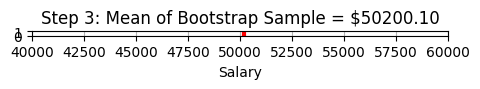

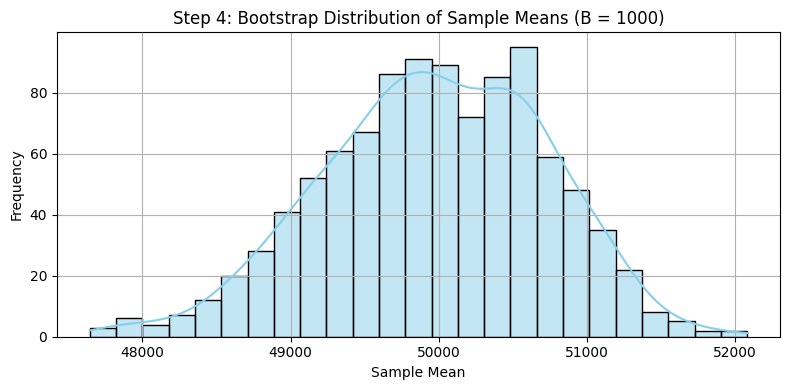

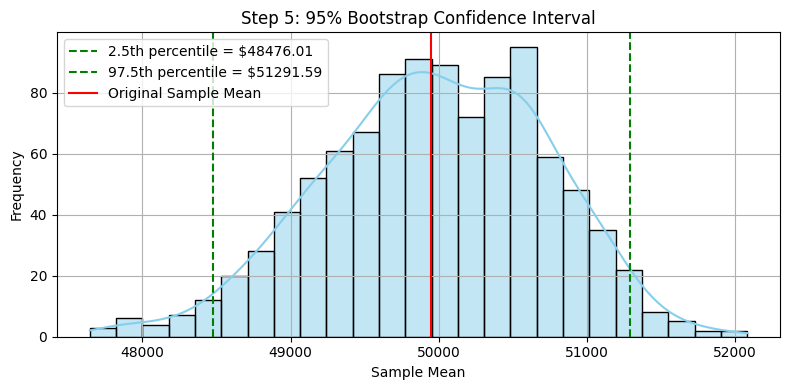

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Step 1: Original sample (10 salaries)
original_sample = np.random.randint(45000, 55000, size=10)

# --- Step 1 Visualization ---
plt.figure(figsize=(6, 3))
plt.stem(original_sample)
plt.title("Step 1: Original Sample (10 Salaries)")
plt.ylabel("Salary ($)")
plt.xlabel("Index")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Draw a bootstrap sample (with replacement)
bootstrap_sample = np.random.choice(original_sample, size=len(original_sample), replace=True)

# --- Step 2 Visualization ---
plt.figure(figsize=(6, 3))
plt.stem(bootstrap_sample, linefmt='orange', markerfmt='ro')
plt.title("Step 2: One Bootstrap Sample (Resampled with Replacement)")
plt.ylabel("Salary ($)")
plt.xlabel("Index")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Compute mean of bootstrap sample
bootstrap_mean = np.mean(bootstrap_sample)

# --- Step 3 Visualization ---
plt.figure(figsize=(5, 1))
plt.axvline(bootstrap_mean, color='red', linestyle='-', linewidth=3)
plt.title(f"Step 3: Mean of Bootstrap Sample = ${bootstrap_mean:.2f}")
plt.xlabel("Salary")
plt.xlim(40000, 60000)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Repeat B times to get bootstrap distribution
B = 1000
boot_means = []
for _ in range(B):
    bs = np.random.choice(original_sample, size=len(original_sample), replace=True)
    boot_means.append(np.mean(bs))

# --- Step 4 Visualization ---
plt.figure(figsize=(8, 4))
sns.histplot(boot_means, bins=25, kde=True, color="skyblue")
plt.title("Step 4: Bootstrap Distribution of Sample Means (B = 1000)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])

# --- Step 5 Visualization ---
plt.figure(figsize=(8, 4))
sns.histplot(boot_means, bins=25, kde=True, color="skyblue")
plt.axvline(ci_lower, color='green', linestyle='--', label=f"2.5th percentile = ${ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='--', label=f"97.5th percentile = ${ci_upper:.2f}")
plt.axvline(np.mean(original_sample), color='red', linestyle='-', label="Original Sample Mean")
plt.title("Step 5: 95% Bootstrap Confidence Interval")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()